Linear ODE with heuristic noises. 

Why is it **"wrong"** to think of an SDE as an ODE plus noise?

$$
d x(t)/dt = -\lambda x(t) dt + q(t),
$$

where $q(t)\sim \mathrm{N}(0, I)$ is a "white noise". 

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)

In [ ]:
T = 2
nsteps = 100
dt = T / nsteps
ts = np.linspace(0., T, nsteps + 1)

lam = 2.
x0 = 3.

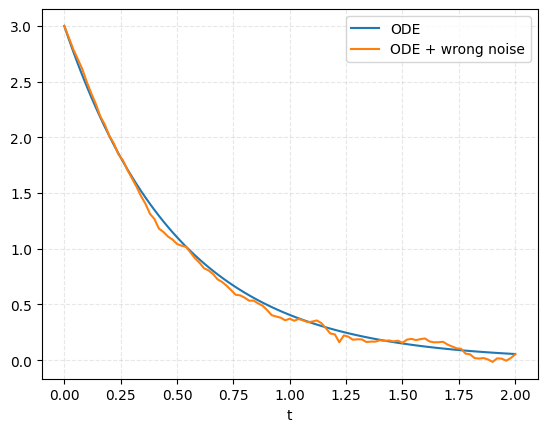

In [ ]:
# Assume that the noised ODE exists. We use Euler to simulate it as dt -> 0
xs = x0 * np.exp(-lam * ts)  # The deterministic ODE solution
xss = np.zeros_like(xs)

x = x0
xss[0] = x0
for k in range(nsteps):
    x += (-lam * x + np.random.randn()) * dt
    xss[k + 1] = x

plt.plot(ts, xs, label='ODE')
plt.plot(ts, xss, label='ODE + wrong noise')
plt.xlabel('t')
plt.grid(linestyle='--', alpha=0.3, which='both')
_ = plt.legend()

What is wrong? 

The correct version is in the following.

In [ ]:
xs = x0 * np.exp(-lam * ts)  # The deterministic ODE solution
xss = np.zeros_like(xs)

x = x0
xss[0] = x0
for k in range(nsteps):
    x += -lam * x * dt + math.sqrt(dt) * np.random.randn()
    xss[k + 1] = x

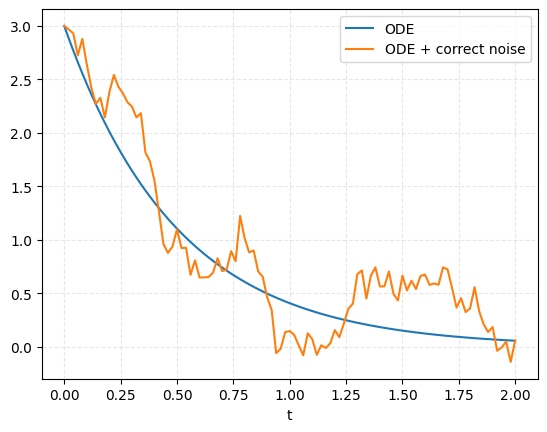

In [ ]:
plt.plot(ts, xs, label='ODE')
plt.plot(ts, xss, label='ODE + correct noise')
plt.xlabel('t')
plt.grid(linestyle='--', alpha=0.3, which='both')
_ = plt.legend()